# Table Of Content
1. ## [Import](#import)
2. ## [Structure of Data](#structure_of_data)
3. ## [loan issued by regions](#loan_issued_by_regions)
4. ## [Bad Loans](#badloans)

# Import 
<a id="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
% matplotlib inline

In [3]:
%time data = pd.read_table('../input/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

CPU times: user 39.5 s, sys: 3.53 s, total: 43.1 s
Wall time: 43.1 s


It's good practice to do not look at the test set so I am going to seperate test data from total data 

In [4]:
data.shape

(855969, 73)

In [5]:
train_df = data[data['issue_d'] < '2015-6-01']
test_df = data[data['issue_d'] >= '2015-6-01']

# Preprocessing
<a id="structure_of_data"></a>

In [6]:
train = train_df.copy()
test = test_df.copy()

In [7]:
train.dtypes.value_counts()

float64           49
object            20
int64              3
datetime64[ns]     1
dtype: int64

In [8]:
print(train.shape)
print(test.shape)

(598978, 73)
(256991, 73)


**Destribution of dependent variable**

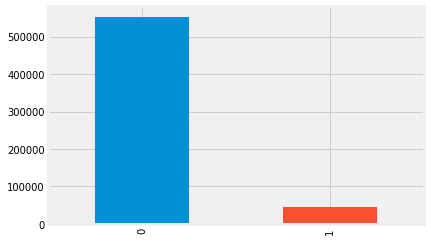

In [9]:
train['default_ind'].value_counts().plot.bar()

**Describution of independent variable**

In [10]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,598978.000000,598978.000000,284010.000000,85758.000000,598978.000000,598978.000000,5.989780e+05,598637.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598922.000000,138227.000000,598978.0,0.0,0.0,598978.000000,5.316650e+05,5.316650e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.316650e+05,0.0,0.0,0.0,598978.000000
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,13.520911,434.562058,7.397280e+04,17.638408,0.297171,0.731226,34.131985,72.798934,11.357197,0.177768,1.650743e+04,55.838410,25.226733,5946.808215,5945.054198,10073.087967,10029.098206,7730.781476,2274.617695,0.439511,67.249287,7.075547,2815.793083,0.011255,43.363084,1.0,NaN,NaN,0.004625,2.089273e+02,1.389905e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.111062e+04,NaN,NaN,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,4.370961,242.892709,5.676163e+04,8.070746,0.828659,1.000495,21.796878,29.075841,5.138351,0.547331,2.093414e+04,23.711238,11.717682,7330.142896,7328.397671,8091.548244,8070.839362,6923.288534,2270.974523,4.245093,491.327816,74.587986,5398.379951,0.119935,21.860221,0.0,NaN,NaN,0.075951,1.268440e+04,1.525544e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.638326e+04,NaN,NaN,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,5.937838e+06,7.205072e+06,8000.000000,8000.000000,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,0.000000,0.000000,16.000000,52.000000,8.000000,0.000000,6.462000e+03,38.800000,17.000000,0.000000,0.000000,4242.350000,4219.600000,2764.050000,821.000000,0.000000,0.000000,0.000000,305.080000,0.000000,26.000000,1.0,NaN,NaN,0.000000,0.000000e+00,2.919700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.370000e+04,NaN,NaN,NaN,0.000000
50%,1.564996e+07,1.763377e+07,12600.000000,12525.000000,12500.000000,13.330000,381.840000,6.300000e+04,17.210000,0.000000,0.000000,31.000000,72.000000,10.000000,0.000000,1.187000e+04,57.000000,24.000000,3032.270000,3031.615000,7631.015000,7593.020000,5393.340000,1573.125000,0.000000,0.000000,0.000000,507.380000,0.000000,43.000000,1.0,NaN,NaN,0.000000,0.000000e+00,8.098600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320000e+04,NaN,NaN,NaN,0.000000
75%,3.671239e+07,3.943412e+07,20000.000000,20000.000000,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,0.000000,1.000000,50.000000,99.000000,14.000000,0.000000,2.061800e+04,74.300000,32.000000,10070.040000,10066.860000,13403.250000,13349.895000,10150.382500,2871.087500,0.000000,0.000000,0.000000,1506.602500,0.000000,60.000000,1.0,NaN,NaN,0.000000,0.000000e+00,2.084020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.870000e+04,NaN,NaN,NaN,0.000000
max,5.095230e+07,5.433202e+07,35000.000000,35000.

In [12]:
train.describe(exclude=np.number)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,598978,598978,598978,564513,570873,598978,598978,598978,598978,121801,598978,598960,598978,598978,598978,598978,598522,354291,598935,598978,0.0
unique,2,7,35,235312,11,6,3,96,2,120325,14,60990,901,50,677,2,97,3,102,1,0.0
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,2014-10-01 00:00:00,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,NaN
freq,427239,173419,39269,7971,195407,301448,210453,37442,598973,230,356155,248846,6735,90043,4563,361847,273965,311462,451313,598978,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train.dtypes.value_counts()

float64           49
object            20
int64              3
datetime64[ns]     1
dtype: int64

## EDA

## Similar Distributions:
<a id="similar_distributions"></a>
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. <br>

<h4> What we need to know: </h4> <br>
<ul>
<li> Understand what amount was <b>mostly issued</b> to borrowers. </li>
<li> Which <b>year</b> issued the most loans. </li>
<li> The distribution of loan amounts is a <b>multinomial distribution </b>.</li>
</ul>
<h4> Summary: </h4><br>
<ul>
<li> Most of the <b>loans issued</b> were in the range of 10,000 to 20,000 USD. </li>
<li> The <b>year of 2015</b> was the year were most loans were issued.</li> 
<li> Loans were issued in an <b>incremental manner</b>. (Possible due to a recovery in the U.S economy) </li>
<li> The loans <b>applied</b> by potential borrowers, the amount <b>issued</b> to the borrowers and the amount <b>funded</b> by investors are similarly distributed, <b>meaning</b> that it is most likely that qualified borrowers are going to get the loan they had applied for. </li>

</ul>




/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total committed by Investors')

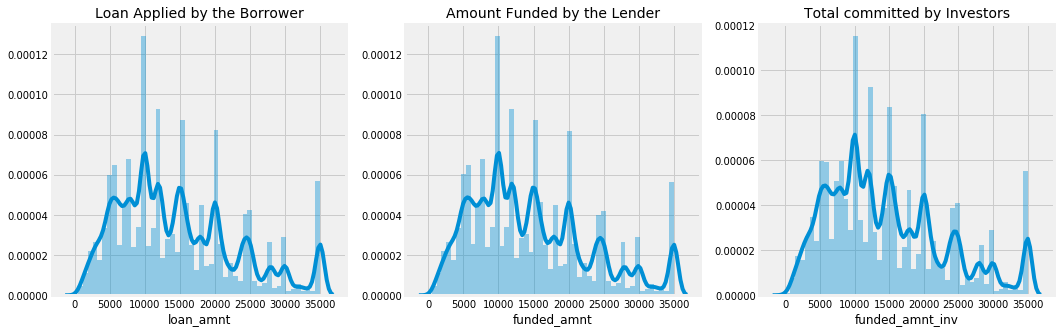

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(train['loan_amnt'], ax=ax[0])
sns.distplot(train['funded_amnt'], ax=ax[1])
sns.distplot(train['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender", fontsize=14)
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
ax[2].set_title("Total committed by Investors", fontsize=14)

 ## Loan Purpose
 
 
 
 **Debt Consolidation** stands as clear winner for loan purpose, with more than 350K loans — or 58% from the total.<br/>

Other highlights include:

**Credit Card**  — more than 130K (~20%)<br>
**Home Improvement **— more than 135K (~6%)<br>
**Other Purposes** — less than 30K (~4%)

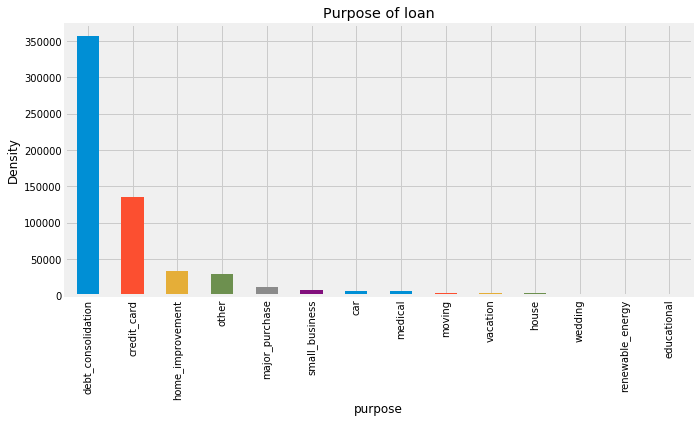

In [15]:
train.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


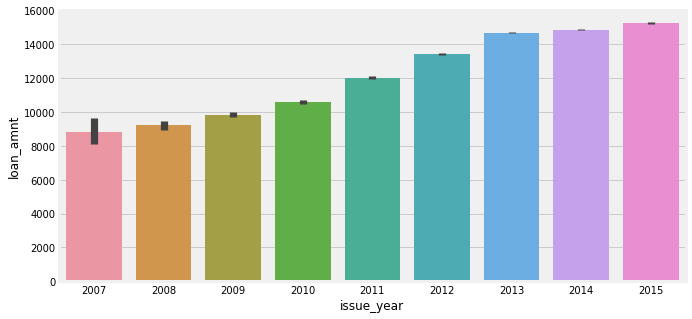

In [16]:
plt.figure(figsize=(10,5))
train['issue_year'] = train['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Yearwise Distribution of defaulter')

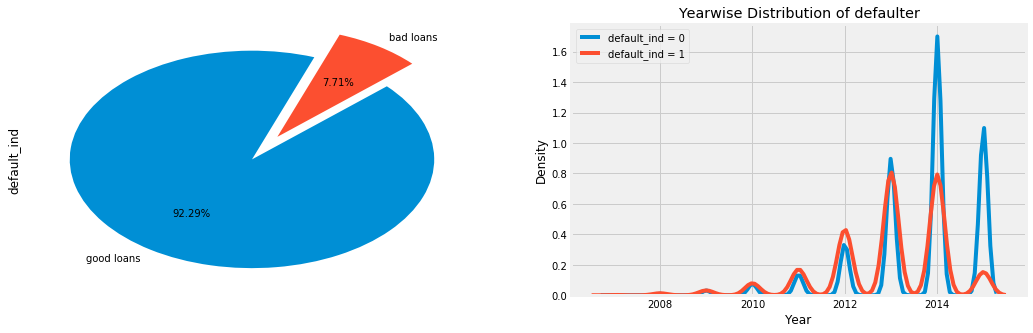

In [17]:
# Loan Status 
fig, ax = plt.subplots(1, 2, figsize=(16,5))
train['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(train.loc[train['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(train.loc[train['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

## Loan Grade

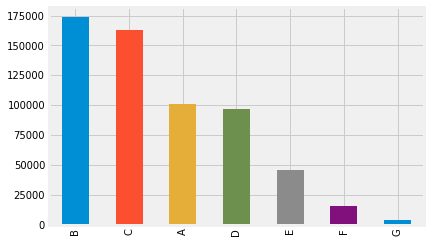

In [18]:
train.grade.value_counts().plot.bar()

(Text(0.5,1,'default_ind=0 vs grade'), Text(0.5,1,'default_ind=1 vs grade'))

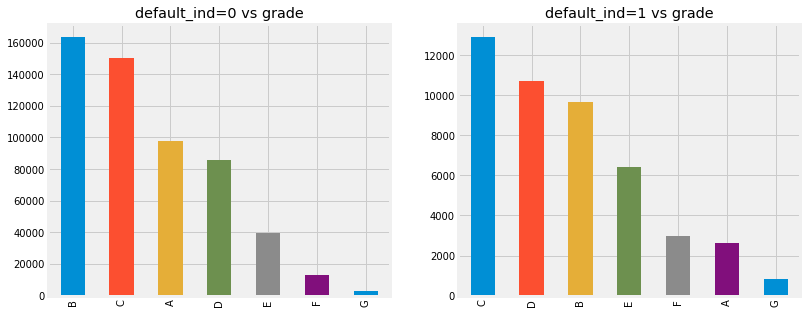

In [19]:
fig,array=plt.subplots(1,2,figsize=(12,5))
train.loc[train['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
train.loc[train['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

## Loan issued by regions
<a id="loan_issued_by_regions"><a/>

In [20]:
train.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [21]:
# Make a list with each of the regions by state.

west = ['WA','CA', 'OR', 'UT','ID','CO', 'NV', 'NM', 'AK', 'MT', 'HI', 'WY']
south_east = ['AZ', 'TX', 'OK','GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

train['region'] = np.nan

def fix_regions(addr_state):
        if addr_state in west:
            return 'west'
        elif addr_state in south_east:
            return 'south east'
        elif addr_state in mid_west:
            return 'mid west'
        else:
            return 'north east'
        
train['region'] = train['addr_state'].apply(fix_regions)

Text(0.5,1,'Loans issued by Region')

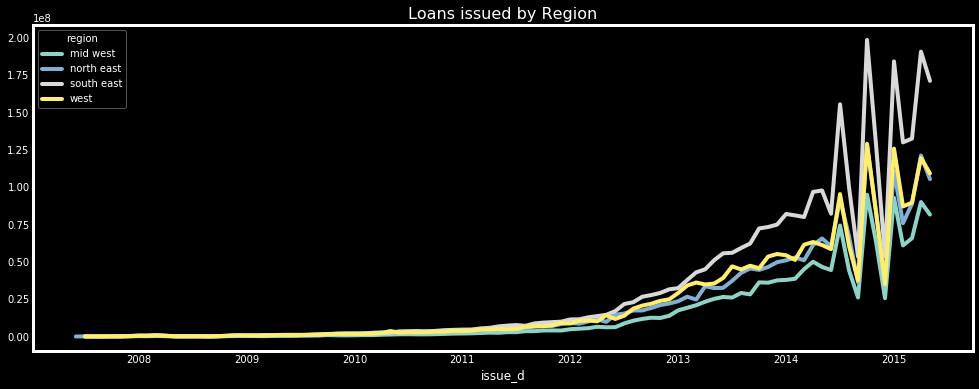

In [88]:
date_amt_region = train[['loan_amnt','issue_d','region']]
plt.style.use('dark_background')
cmap = plt.cm.Set3
by_issued_amount = date_amt_region.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

## Converting emp length into integer

In [61]:
train.emp_length.unique()
train.loc[train['emp_length']=='10+ years','emp_len'] = 10
train.loc[train['emp_length']=='<1 year','emp_len'] = .5
train.loc[train['emp_length']=='1 year','emp_len'] = 1
train.loc[train['emp_length']=='3 years','emp_len'] = 3
train.loc[train['emp_length']=='8 years','emp_len'] = 8
train.loc[train['emp_length']=='9 years','emp_len'] = 9
train.loc[train['emp_length']=='4 years','emp_len'] = 4
train.loc[train['emp_length']=='5 years','emp_len'] = 5
train.loc[train['emp_length']=='6 years','emp_len'] = 6
train.loc[train['emp_length']=='2 years','emp_len'] = 2
train.loc[train['emp_length']=='7 years','emp_len'] = 7
train.loc[train['emp_length']=='nan','emp_len'] = 0

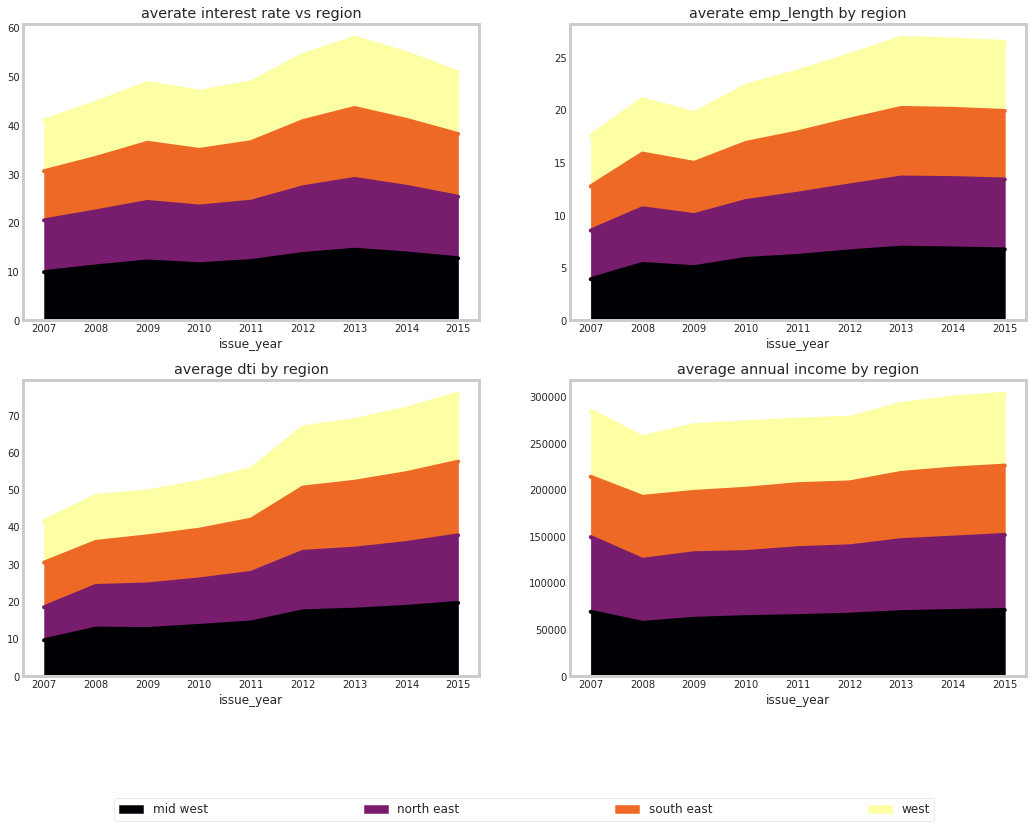

In [86]:
# Loan issued by Region ,Credit Score and grade

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

regional_interest_rate = train.groupby(['issue_year', 'region']).int_rate.mean()
regional_interest_rate.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax1)

regional_emp_length = train.groupby(['issue_year', 'region']).emp_len.mean()
regional_emp_length.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax2)

regional_dti = train.groupby(['issue_year', 'region']).dti.mean()
regional_dti.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax3)

regional_interest_rate = train.groupby(['issue_year', 'region']).annual_inc.mean()
regional_interest_rate.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax4)
ax1.set_title('averate interest rate vs region'),ax2.set_title('averate emp_length by region')
ax3.set_title('average dti by region'),ax4.set_title('average annual income by region')

ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

## Missing Value Treatement

In [ ]:
def missing_values_table(df):
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percentage_missing = (100*df.isnull().sum()/len(df)).sort_values(ascending=False)
    missing_table = pd.DataFrame({'missing values':total_missing,'% missing':percentage_missing})
    return missing_table

In [ ]:
missing_values = missing_values_table(train)
missing_values.head(20)

In [ ]:
train.dtypes.value_counts()

In [ ]:
def to_datepart(df,fldname,drop=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 
            'Is_year_end', 'Is_year_start']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64)
    if drop: df.drop(fldname, axis=1, inplace=True)

In [ ]:
import re
to_datepart(train,'issue_d',drop=True)
to_datepart(test,'issue_d',drop=True)

In [ ]:
def treat_missing(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df.fillna(df[c].mode()[0],inplace=True)
        else:
            df.fillna(df[c].median(),inplace=True)

In [ ]:
treat_missing(train)
treat_missing(test)

## Treating Categorical Values

In [ ]:
def train_cat(df):
    for n,c in df.items():
        if df[n].dtype == 'object': df[n] = c.astype('category').cat.as_ordered()

In [ ]:
train_cat(train)
train_cat(test)

In [ ]:
train.select_dtypes('category').apply(pd.Series.nunique, axis = 0)

In [ ]:
to_drop = ['sub_grade','emp_title','desc','title','zip_code',
           'addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [ ]:
train.drop(to_drop,axis=1,inplace=True)
test.drop(to_drop,axis=1,inplace=True)

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].dtype == 'object':
        if len(list(train[c].unique())) <= 2:
            train[c] = le.fit_transform(train[c])
            test[c] = le.transform(test[c])

## One Hot Encoding

In [ ]:
# print(train.shape)
# print(test.shape)
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)
# print(train.shape)
# print(test.shape)

## Aligning training and test data

In [ ]:
train_label = train['default_ind']
# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['default_ind'] = train_label

print(train.shape)
print(test.shape)

## EDA

In [ ]:
correlation = train.corr()['default_ind'].sort_values(ascending=False)
correlation.dropna(inplace=True)

In [ ]:
fig,array = plt.subplots(1,2,figsize=(12,3))
correlation.head(10).plot.bar(ax=array[0])
correlation.tail(10).plot.bar(ax=array[1])

In [ ]:
train.application_type.value_counts()

## Dependent and Independent Variable

In [ ]:
X = train.copy()
y = X.pop('default_ind')

In [ ]:
def split_vals(a,n):return a[:n].copy(),a[n:].copy()

In [ ]:
n_valid = len(test_df)  # same as test set size
n_trn = len(X)-n_valid
raw_train,raw_valid = split_vals(train_df,n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

## Fitting the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=100)
%time m.fit(X_train,y_train),m.oob_score_

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score
y_pred = m.predict(X_valid)
print(confusion_matrix(y_valid,y_pred))
print(precision_score(y_valid,y_pred))
print(recall_score(y_valid,y_pred))
print(roc_auc_score(y_valid,y_pred))

## Tuning the model

## Feature Importnace

In [ ]:
def feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [ ]:
fi = feat_importance(m, X_train); fi[:10]

In [ ]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
plot_fi(fi[:20])

In [ ]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

In [ ]:
X_keep = X[to_keep].copy()
X_train, X_valid = split_vals(X_keep, n_trn)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

In [ ]:
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))
print(roc_auc_score(y_valid,y_pred))

In [ ]:
fi = feat_importance(m, X_keep)
plot_fi(fi)

# Removing redundant features
One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

## Clustering Analysis

In [ ]:
import scipy 
from scipy.cluster import hierarchy as hc

In [ ]:
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [ ]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(X, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [ ]:
get_oob(X_keep)

Now we try removing each variable one at a time.

In [ ]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

In [ ]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

Looking good! Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

In [ ]:
X_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [ ]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [ ]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

And let's see how this model looks on the full dataset.

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)